## Polynomial Regression

We've discussed the basics of regression. You need to keep in mind that linearity is often not something we actually meet in the real world. The details of a model are decided based on the data we have. In this notebook, we'll see how we can use polynomial regression to fit a non-linear model to our data.  

Firstly, *polynomial*: we fit a curved line to our data. The curve is a polynomial of a certain degree. The degree of the polynomial is the highest power of the independent variable. For example, a polynomial of degree 2 is of the form:  
$$y = ax^2 + bx + c$$  

The more we add to our model, the more complex it becomes (and the more it can fit to the data). However, we need to be careful about overfitting. We'll see how we can use regularization to avoid overfitting.

### The cool thing

As you can see in the formula above, it's not our parameters (a,b,c) that are squared, but rather it's the input data (x). This is the reason why we call it *polynomial regression*. We define a polynom. We can have whatever combination of **features** we want, but our weights still define a linear model.  
**This means our work from before works here as well, we just have to change the features.**  
Remember the vectorized implementation? We can use it here.

So we generate input like before, but this time we add a second feature, which is the square of the first feature. We also add a bias term (the column of ones that correspond to the free parameter).

In [2]:
# We have a dataset of 2D points, and we want to fit a line to it.
# We will use the normal equation formulas to find the line that minimizes the squared error.

# First, importing the libraries we need
import numpy as np
import matplotlib.pyplot as plt


In [64]:
# And here is an implementation of the vectorized version

def generateData(numPoints: int):
    # we now generate X as a matrix with the bias incorporated
    bias = np.ones(numPoints)
    # X = np.array([i for i in range(numPoints)])
    # X = np.random.uniform(low=0.0,high = 1.0, size=100)
    X = np.linspace(0,1,numPoints)
    Xsq = np.multiply(X,X)
    X = np.column_stack([Xsq, X, bias])
    y = np.sum(X,axis=1) + np.random.uniform(low=0.0,high=0.5,size=100)
    return X, y


def plotData(X, y):
    plt.plot(np.linspace(0,1,100), y, "ro", markersize=2)


def plotLine(X, theta, labelUsed=""):
    plt.plot(np.linspace(0,1,100), np.dot(X, theta), "-", label=labelUsed)


def plotShow():
    plt.legend(loc="upper left")
    plt.show()


In [6]:
# And now computing theta
def findTheta(X, y):
    xTxInv = np.linalg.inv(np.matmul(X.T, X))
    xTy = np.matmul(X.T, y)
    theta = np.matmul(xTxInv, xTy)
    return theta


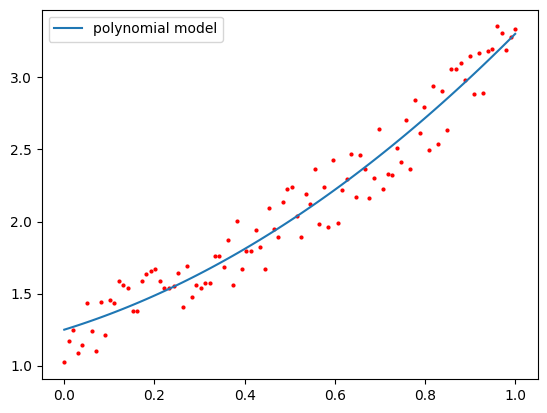

In [65]:
X,y = generateData(100)
theta = findTheta(X,y)
plotData(X,y)
plotLine(X,theta, labelUsed= "polynomial model")
plotShow()

### Discussion

If you follow the code, you will notice that we actually transformed our input data to match our desired form. This enables us to keep using a linear model, but still achieve non-linear solutions. We can actually go further and try to generate higher-order polynomial data, then fit to it. Or even combine multiple features. Let's say instead of just "x", we had $x_1$, $x_2$ and so on. These are our features. We can then combine them into something like $x_1x_2$ and it would still be called a polynomial regression.  

You can try this out if you want to.